In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import joblib  # For loading the saved model

In [16]:
# Load the ET model
model = joblib.load("ETIFTH2.pkl")

C:\Users\ZenBook 14\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ZenBook 14\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [29]:
# Load Training data from an Excel file
dataTr = pd.read_excel('TrainingDataIFTH2ETGOA.xlsx')  # Replace 'data.xlsx' with your file path
dataTr
# the names of the variables correspond to :
# a is P (MPa)
# b is T (K)
# c is Salinity, Molality (mol/kg)
# d is avg. critical temperature (Tcm, K)
# y is IFT (mN/m)

,a,b,c,d,y
0,10.34214,298.00,0.017,33.2,64.94243
1,2.72340,423.15,0.000,33.2,48.33510
2,3.45000,323.15,3.150,114.5,67.80000
3,3.45000,353.15,3.150,114.5,57.73000
4,20.68427,298.00,0.085,33.2,68.28540
...,...,...,...,...,...
196,34.48100,423.15,4.950,33.2,56.40880
197,1.00000,322.90,0.000,33.2,69.30000
198,13.72950,298.15,4.950,33.2,78.53590
199,20.68000,323.15,1.050,168.7,38.24000


In [30]:
# Load Test data from an Excel file
dataTs = pd.read_excel('TestDataIFTH2ETGOA.xlsx')  # Replace 'data.xlsx' with your file path
dataTs
# the names of the variables correspond to :
# a is P (MPa)
# b is T (K)
# c is Salinity, Molality (mol/kg)
# d is avg. critical temperature (Tcm, K)
# y is IFT (mN/m)

,a,b,c,d,y
0,8.270000,353.15,1.050,222.90,35.26000
1,10.100000,298.04,0.000,33.20,71.90000
2,5.515800,323.15,1.700,33.20,53.12220
3,3.450000,323.15,0.000,168.70,57.93000
4,1.206582,298.00,0.000,33.20,72.40376
5,20.680000,323.15,3.150,168.70,41.48000
6,20.680000,323.15,0.000,114.50,47.23000
7,6.890000,333.15,0.340,64.68,65.24000
8,25.000000,298.04,0.000,33.20,70.30000
9,20.100000,372.85,0.000,33.20,58.70000


In [31]:
# Split the data into features and target variable
XTr = dataTr.drop('y', axis=1)
y_train = dataTr['y']
XTs = dataTs.drop('y', axis=1)
y_test = dataTs['y']

In [32]:
# Make predictions Training data
pred_train = model.predict(XTr)
# Make predictions Test data
pred_test = model.predict(XTs)

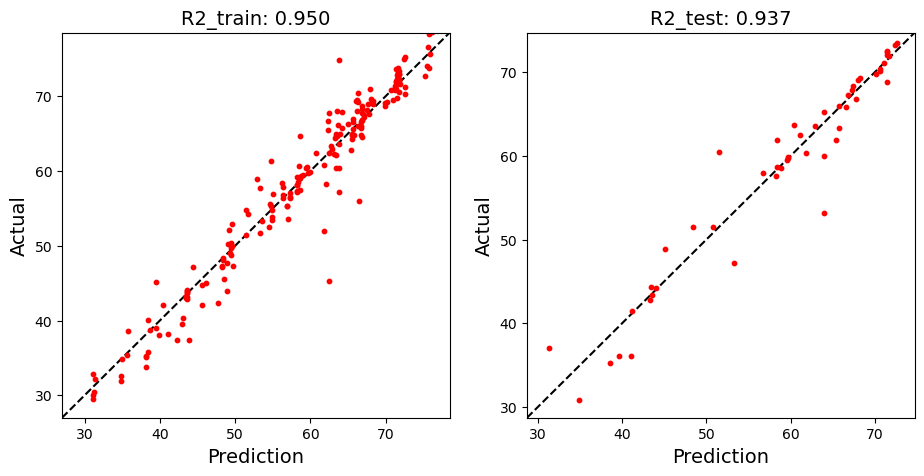

In [33]:
# Display the cross plots of training and test
train_labels = y_train
test_labels = y_test
plt.figure(figsize=(11, 5))

plt.subplot(121)
plt.scatter(pred_train, y_train, c='r', s=10)
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
lim = min(x1, y1), min(x2, y2)
plt.xlim(*lim)
plt.ylim(*lim)
plt.plot(lim, lim, 'k--', zorder=-1)
plt.xlabel("Prediction", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title(f"R2_train: {r2_score(train_labels, pred_train):.3f}", fontsize=14)

plt.subplot(122)
plt.scatter(pred_test, y_test, c='r', s=10)
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
lim = min(x1, y1), min(x2, y2)
plt.xlim(*lim)
plt.ylim(*lim)
plt.plot(lim, lim, 'k--', zorder=-1)
plt.xlabel("Prediction", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title(f"R2_test: {r2_score(test_labels, pred_test):.3f}", fontsize=14);
plt.show()

In [37]:
# Load Other data to check the model from an Excel file: This is just an example how to apply the model for other data with unknown IFT value
dataOther = pd.read_excel('OtherDataIFTH2ET.xlsx')  # Replace 'data.xlsx' with your file path
dataOther

,a,b,c,d
0,13.79,353.15,3.15,222.9


In [38]:
# Split the data into features
features = ['a','b','c','d']
X = dataOther[features]

In [39]:
# Make predictions Training data
predIFT = model.predict(X)
print(predIFT)

[35.69625841]
